In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
ds=pd.read_csv("TRAIN.csv")
ds.head(10)

,index,time_stamp,cab_provider,source,destination,distance,surge_multiplier,cab_type,fare
0,0,1543203646318,Lyft,Boston University,Theatre District,3.03,1.0,Lux Black XL,34.0
1,1,1543203646319,Uber,South Station,Theatre District,1.30,1.0,Black,18.5
2,2,1543203646320,Uber,Theatre District,Fenway,2.71,1.0,UberX,19.5
3,3,1543203646320,Lyft,Northeastern University,Beacon Hill,2.43,1.0,Lyft,10.5
4,4,1543203646320,Uber,Theatre District,Fenway,2.71,1.0,UberXL,32.0
5,5,1543203646358,Uber,Beacon Hill,North End,2.19,1.0,UberX,8.0
6,6,1543203646358,Uber,North Station,Fenway,3.05,1.0,WAV,10.5
7,7,1543203646358,Uber,Beacon Hill,North End,2.19,1.0,UberXL,13.0
8,8,1543203646358,Uber,Beacon Hill,North End,2.19,1.0,Black,17.5
9,9,1543203646359,Lyft,Theatre District,Northeastern University,2.22,1.0,Shared,7.0


In [37]:
print(ds.shape)
ds.dtypes

(100000, 9)

In [39]:
Y=pd.DataFrame(data=ds.iloc[:,8].values,columns=["target"])
ds=ds.drop(["index","fare"],axis=1)
ds.head()

,time_stamp,cab_provider,source,destination,distance,surge_multiplier,cab_type
0,1543203646318,Lyft,Boston University,Theatre District,3.03,1.0,Lux Black XL
1,1543203646319,Uber,South Station,Theatre District,1.30,1.0,Black
2,1543203646320,Uber,Theatre District,Fenway,2.71,1.0,UberX
3,1543203646320,Lyft,Northeastern University,Beacon Hill,2.43,1.0,Lyft
4,1543203646320,Uber,Theatre District,Fenway,2.71,1.0,UberXL


In [56]:
#x=set(ds["cab_provider"])   ##{'Lyft', 'Uber'}
#x=set(ds["source"])   ## ------{'Back Bay','Beacon Hill','Boston University','Fenway','Financial District','Haymarket Square','North End','North Station','Northeastern University','South Station','Theatre District','West End'}
#x=set(ds["destination"])   ##{'Back Bay','Beacon Hill','Boston University','Fenway','Financial District','Haymarket Square','North End','North Station','Northeastern University',South Station','Theatre District','West End'}

#x=set(ds["cab_type"])
#x

In [41]:
from sklearn.preprocessing import LabelEncoder

ds["cab_provider"] = LabelEncoder().fit_transform(ds["cab_provider"])
ds["source"] = LabelEncoder().fit_transform(ds["source"])
ds["destination"] = LabelEncoder().fit_transform(ds["destination"])
ds["cab_type"] = LabelEncoder().fit_transform(ds["cab_type"])

ds.head()

,time_stamp,cab_provider,source,destination,distance,surge_multiplier,cab_type
0,1543203646318,0,2,10,3.03,1.0,4
1,1543203646319,1,9,10,1.30,1.0,0
2,1543203646320,1,10,3,2.71,1.0,9
3,1543203646320,0,8,1,2.43,1.0,5
4,1543203646320,1,10,3,2.71,1.0,10


In [42]:
ds["time_stamp"]=pd.to_datetime(ds["time_stamp"],unit="ms")
ds.head()

,time_stamp,cab_provider,source,destination,distance,surge_multiplier,cab_type
0,2018-11-26 03:40:46.318,0,2,10,3.03,1.0,4
1,2018-11-26 03:40:46.319,1,9,10,1.30,1.0,0
2,2018-11-26 03:40:46.320,1,10,3,2.71,1.0,9
3,2018-11-26 03:40:46.320,0,8,1,2.43,1.0,5
4,2018-11-26 03:40:46.320,1,10,3,2.71,1.0,10


In [43]:
ds["time_stamp"] = LabelEncoder().fit_transform(ds["time_stamp"])
ds.head()

,time_stamp,cab_provider,source,destination,distance,surge_multiplier,cab_type
0,0,0,2,10,3.03,1.0,4
1,1,1,9,10,1.30,1.0,0
2,2,1,10,3,2.71,1.0,9
3,2,0,8,1,2.43,1.0,5
4,2,1,10,3,2.71,1.0,10


In [44]:
ds.describe()

,time_stamp,cab_provider,source,destination,distance,surge_multiplier,cab_type
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,9163.265530,0.518630,5.498010,5.505930,2.188783,1.014945,5.523300
std,5142.572864,0.499655,3.448065,3.450409,1.142837,0.095462,3.497842
min,0.000000,0.000000,0.000000,0.000000,0.020000,1.000000,0.000000
25%,4683.750000,0.000000,3.000000,3.000000,1.280000,1.000000,2.000000
50%,9251.000000,1.000000,5.000000,6.000000,2.150000,1.000000,6.000000
75%,13620.000000,1.000000,9.000000,8.000000,2.930000,1.000000,9.000000
max,17957.000000,1.000000,11.000000,11.000000,7.500000,3.000000,11.000000


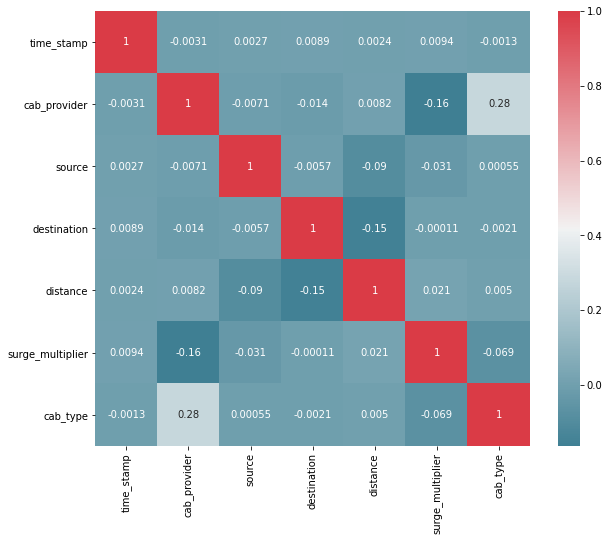

In [18]:
# Heatmap
import numpy as np
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = ds.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax,annot=True)
plt.show()

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(ds,Y,test_size=.25,random_state=42)
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75000 entries, 98980 to 15795
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   time_stamp        75000 non-null  int64  
 1   cab_provider      75000 non-null  int32  
 2   source            75000 non-null  int32  
 3   destination       75000 non-null  int32  
 4   distance          75000 non-null  float64
 5   surge_multiplier  75000 non-null  float64
 6   cab_type          75000 non-null  int32  
dtypes: float64(2), int32(4), int64(1)
memory usage: 3.4 MB


In [47]:
# Evaluation Metrics
from sklearn import metrics
def print_error(X_test, y_test, model_name):
    prediction = model_name.predict(X_test)
  #  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
  #  print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
  #  cm=metrics.confusion_matrix(y_test,prediction.round())
  #  sns.heatmap(cm,annot=True)
 #   plt.show()
  #  print("Accuracy of Model:",metrics.accuracy_score(y_test,prediction.round())) 

In [48]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

import keras
from keras.layers import Dense


In [55]:
def model_scale(scler):
    if scler =="MinMaxScaler":
        x_train_n = MinMaxScaler().fit_transform(x_train)
        x_test_n = MinMaxScaler().fit_transform(x_test)
    elif scler == "StandardScaler":
        x_train_n = StandardScaler().fit_transform(x_train)
        x_test_n = StandardScaler().fit_transform(x_test)
    elif scler == "PowerTransformer":
        x_train_n = PowerTransformer(method='yeo-johnson').fit_transform(x_train)
        x_test_n = PowerTransformer(method='yeo-johnson').fit_transform(x_test)
    elif scler =="QuantileTransformer":
        x_train_n = QuantileTransformer(output_distribution='normal').fit_transform(x_train)
        x_test_n = QuantileTransformer(output_distribution='normal').fit_transform(x_test)
    
    """print("logistic regression model prediction error:\n")
    #by using logistic regression model
    from sklearn.linear_model import LogisticRegression
    log_m=LogisticRegression()
    log_m.fit(x_train_n,y_train)
    print_error(x_test_n,y_test,log_m)
    """
    print("linear regression model prediction error:\n")
    #by using linear regression model
    from sklearn import linear_model
    lrm=linear_model.LinearRegression()
    lrm.fit(x_train_n,y_train)
    print_error(x_test_n,y_test,lrm)
    """
    """

    print("\nSupport Vector Regressor Model prediction error:\n")
    #by using Support Vector Regressor
    from sklearn.svm import SVR
    Svrm=SVR()
    Svrm.fit(x_train_n,y_train)
    print_error(x_test_n,y_test,Svrm)
    """
    """

    print("\nDecision Tree Regressor Model prediction error:\n")
    #Decision Tree Regressor
    from sklearn.tree import DecisionTreeRegressor
    dtrm=DecisionTreeRegressor()
    dtrm.fit(x_train_n,y_train)
    print_error(x_test_n,y_test,dtrm)
    """
    """

    print("\nRandom Forest Regressor Model prediction error:\n")
    #
    # Random Forest Regressor
    from sklearn.ensemble import RandomForestRegressor
    n_estimators = 200
    max_depth = 25
    min_samples_split=15
    min_samples_leaf=2

    rfrm = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split)
    rfrm.fit(x_train_n,y_train)
    print_error(x_test_n,y_test, rfrm)
    
    
    print("\nArtificial Neural Network Model prediction error:\n")
    #Artificial Neural Network by using Adam smith optimizer
    ann = keras.models.Sequential([Dense(8,activation="relu",
                                         input_shape=x_train_n.shape[1:]),
                                   Dense(8,activation="relu"),
                                   Dense(1)])
    optimizer=keras.optimizers.Adam()
    loss=keras.losses.mean_squared_error

    ann.compile(optimizer=optimizer,
                loss=loss,
                metrics=["mean_squared_error"])

    #..........

    history=ann.fit(x_train_n,y_train,epochs=150)
    ann.summary()
    print_error(x_test_n,y_test,ann)
    
   # print("Score of log_m",log_m.score(x_test_n,y_test))
    print("Score of lrm",lrm.score(x_test_n,y_test))
    print("Score of dtrm",dtrm.score(x_test_n,y_test))
    print("Score of svrm",Svrm.score(x_test_n,y_test))
    print("Score of rfrm",rfrm.score(x_test_n,y_test))

In [30]:
item=["MinMaxScaler","StandardScaler","PowerTransformer","QuantileTransformer"]
for scaler in item:
    print("By using"+scaler+"method")
    model_scale(scaler)

By usingMinMaxScalermethod
linear regression model prediction error:

Root Mean Squared Error: 6.507177639068633

Support Vector Regressor Model prediction error:



c:\users\aman's notebook\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Root Mean Squared Error: 5.1426994018461825

Decision Tree Regressor Model prediction error:

Root Mean Squared Error: 2.291944894625523

Random Forest Regressor Model prediction error:



<ipython-input-28-da47aa91df12>:59: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfrm.fit(x_train_n,y_train)


Root Mean Squared Error: 1.7248737062834234
Score of lrm 0.5106481673355708
Score of dtrm 0.9392922360098831
Score of svrm 0.6943543820824747
Score of rfrm 0.9656164671544677
By usingStandardScalermethod
linear regression model prediction error:

Root Mean Squared Error: 6.507358570718066

Support Vector Regressor Model prediction error:



c:\users\aman's notebook\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Root Mean Squared Error: 5.167305868505717

Decision Tree Regressor Model prediction error:

Root Mean Squared Error: 2.4870373941700192

Random Forest Regressor Model prediction error:



<ipython-input-28-da47aa91df12>:59: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfrm.fit(x_train_n,y_train)


Root Mean Squared Error: 1.7731975355371115
Score of lrm 0.5106209541657263
Score of dtrm 0.9285173697633533
Score of svrm 0.6914225166222678
Score of rfrm 0.9636629110649025
By usingPowerTransformermethod


c:\users\aman's notebook\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
c:\users\aman's notebook\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
c:\users\aman's notebook\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


linear regression model prediction error:

Root Mean Squared Error: 6.848197496452194

Support Vector Regressor Model prediction error:

Root Mean Squared Error: 5.204001912321737

Decision Tree Regressor Model prediction error:

Root Mean Squared Error: 3.6918308466125582

Random Forest Regressor Model prediction error:



<ipython-input-28-da47aa91df12>:59: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfrm.fit(x_train_n,y_train)


Root Mean Squared Error: 2.584254956535066
Score of lrm 0.45801352774232873
Score of dtrm 0.8424858832980722
Score of svrm 0.6870241779995347
Score of rfrm 0.9228196738301238
By usingQuantileTransformermethod
linear regression model prediction error:

Root Mean Squared Error: 7.790194448831906

Support Vector Regressor Model prediction error:



c:\users\aman's notebook\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Root Mean Squared Error: 6.241880334454828

Decision Tree Regressor Model prediction error:

Root Mean Squared Error: 2.349426525771768

Random Forest Regressor Model prediction error:



<ipython-input-28-da47aa91df12>:59: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfrm.fit(x_train_n,y_train)


Root Mean Squared Error: 1.743309625804856
Score of lrm 0.2986537326006624
Score of dtrm 0.9362089678291071
Score of svrm 0.5497364713468416
Score of rfrm 0.9648775380984915
